<a href="https://colab.research.google.com/github/sudhanshu196r/Applied_Statistics_Project/blob/main/Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starting with Data

In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
#Rows and columns
print(df.shape)

(48895, 16)


In [10]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
#describing dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
#duplicate count
data_dup = df.duplicated().sum()
print(data_dup)

0


In [13]:
#print null values
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


# Info about dataset
1. Dataset containd 48895 columns and 16 rows
2. There are total 4 columns with null values
3. Min price is 0 and max is 10000 and mean price is 152.
4. Average stay is 7 days

# Understanding Variables

In [14]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

we get to know that some columns falls under categorical and remaining are numeriacal except one last_review comes under Date_Time category.

Categorical variable : name,neighbourhood_group, neighbourhood, room_type

Numerical variable : id, host_id, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365

Date_Time variable : last_review

Coordinates : latitude, longitude

1. ID: A unique identifier for each Airbnb listing.
2. Name: Name of the listing.
3. Host ID: A unique identifier for each Airbnb host.
4. host name: name of the host
5. Neighborhood_group: location of the Airbnb listing.
6. Neighborhood: Area of the Airbnb listing.
7. Latitude: The latitude coordinate of the listing's location.
8. Longitude: The longitude coordinate of the listing's location.
9. Room Type: The type of room available for booking, such as an entire home/apartment, private room, or shared room.
11. Price: The price per night for renting the Airbnb listing.
12. Minimum Nights: The minimum number of nights required for a booking.
13. Number of reviews: number of reviews
14. last_review: content of last review
15. reviews per months:number of checks per months
16. calculate host listing count: total count
17. Availability_360: The availability of the listing around the year.




In [15]:
#check unique values
print(df.nunique())

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


From the above output we can say that there are 5 unique neighbourhood type and 3 types of room

# Deal with null values

In [16]:
#print all columns with null value count
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [17]:
#handling null values
df.fillna({'name':'Not found'}, inplace=True)
df.fillna({'host_name':'Others'}, inplace=True)
df.fillna({'reviews_per_month':0}, inplace=True)

In [18]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [19]:
# drop the last_review column
df.drop(['last_review'], axis=1, inplace=True)

# Getting Insight from Data

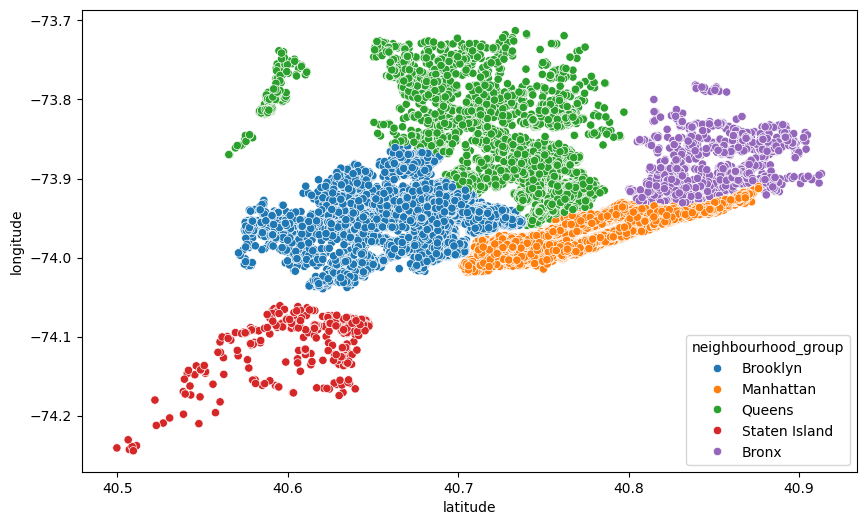

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', hue='neighbourhood_group', data=df)
plt.show()

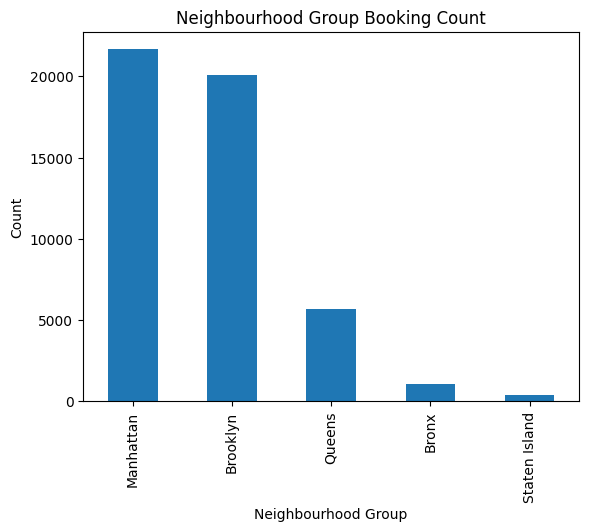

In [21]:
#most number of bookings neighbourhood group wise
df.neighbourhood_group.value_counts().plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Neighbourhood Group Booking Count')
plt.show()


In [22]:
# Top 5 neighbourhood listing
neighbourhood=df.groupby(['neighbourhood_group','neighbourhood'])['neighbourhood'].value_counts().sort_values(ascending=False).reset_index(name='total')
neighbourhood.head(5)

,neighbourhood_group,neighbourhood,total
0,Brooklyn,Williamsburg,3920
1,Brooklyn,Bedford-Stuyvesant,3714
2,Manhattan,Harlem,2658
3,Brooklyn,Bushwick,2465
4,Manhattan,Upper West Side,1971


Text(0, 0.5, 'bookings')

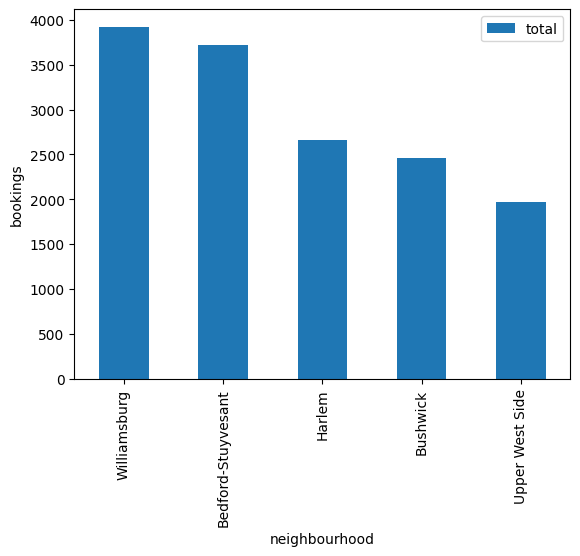

In [23]:
# Top 5 neighbourhood
neighbourhood.head(5).plot(kind='bar',x='neighbourhood',y='total')
plt.xlabel('neighbourhood')
plt.ylabel('bookings')

In [24]:
neighbourhood.tail(5)

,neighbourhood_group,neighbourhood,total
216,Staten Island,Richmondtown,1
217,Staten Island,New Dorp,1
218,Staten Island,Fort Wadsworth,1
219,Staten Island,Willowbrook,1
220,Staten Island,Woodrow,1


Text(0, 0.5, 'bookings')

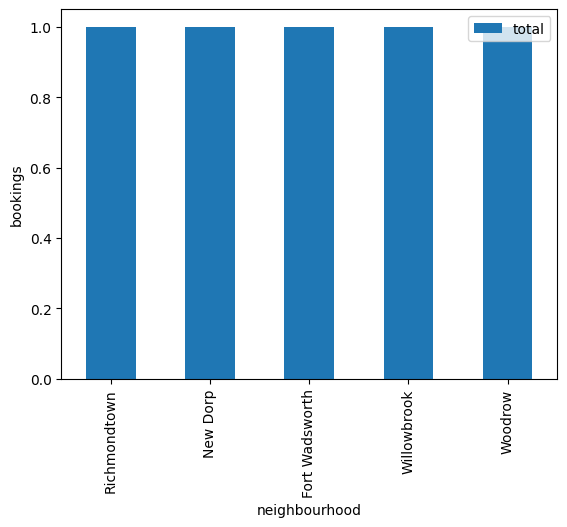

In [25]:
neighbourhood.tail(5).plot(kind='bar',x='neighbourhood',y='total')
plt.xlabel('neighbourhood')
plt.ylabel('bookings')

In [26]:
#Top 5 host names
host_names=df.groupby(['host_name'])['host_name'].value_counts().sort_values(ascending=False).reset_index(name='total')
host_names.head(5)

,host_name,total
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279


Text(0.5, 1.0, 'Top 5 host names')

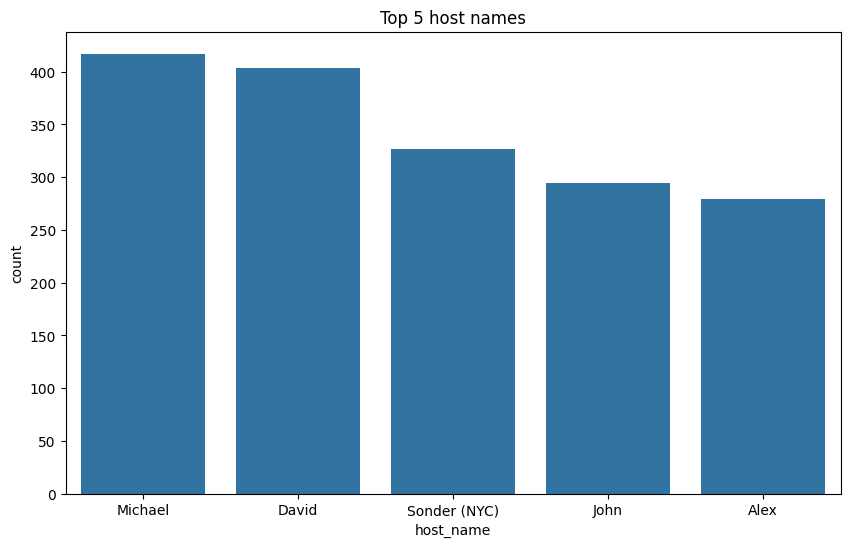

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x=host_names.head(5)['host_name'],y=host_names.head(5)['total'])
plt.xlabel('host_name')
plt.ylabel('count')
plt.title('Top 5 host names')

In [28]:
#Top 5 host id
host_ids = df.groupby(['host_id','host_name'])['host_id'].value_counts().sort_values(ascending=False)
host_ids.head(5)

,,count
host_id,host_name,
219517861,Sonder (NYC),327
107434423,Blueground,232
30283594,Kara,121
137358866,Kazuya,103
16098958,Jeremy & Laura,96


Text(0.5, 1.0, 'Top 5 host ids')

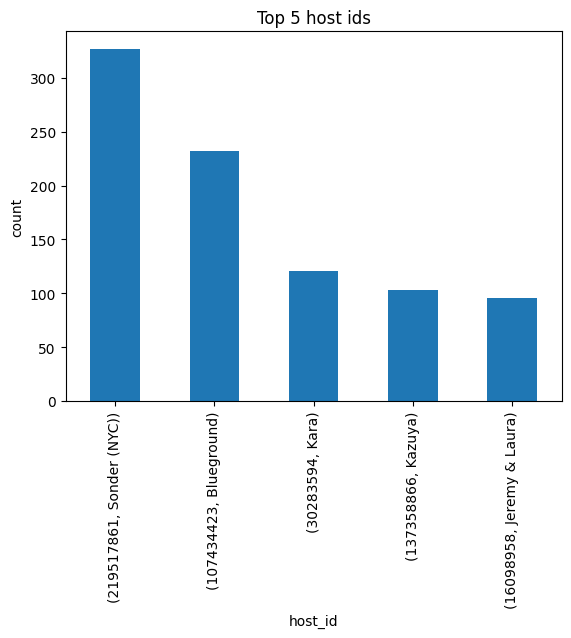

In [29]:
host_ids.head(5).plot(kind='bar')
plt.xlabel('host_id')
plt.ylabel('count')
plt.title('Top 5 host ids')

In [30]:
#room types
room_types = df.groupby(['room_type']).size()
room_types


,0
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


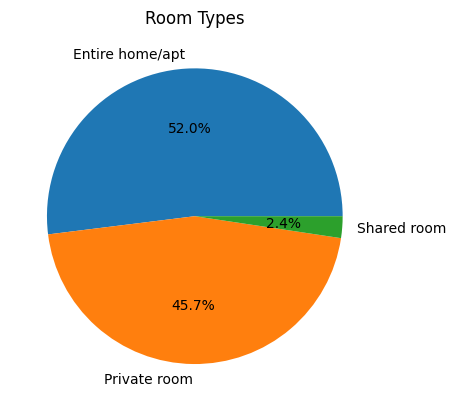

In [31]:
plt.pie(room_types,labels=room_types.index,autopct='%1.1f%%')
plt.title('Room Types')
plt.show()

# Top 10 apartment listing

In [32]:
apt = df[df['room_type']=='Entire home/apt']
apt.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [38]:
top_apartments = apt.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='Apartment').sort_values(by='Apartment',ascending=False)
top_apartments.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,Apartment
20219,219517861,Sonder (NYC),Financial District,Manhattan,210
6452,7503643,Vida,Greenpoint,Brooklyn,52
8434,12243051,Sonder,Financial District,Manhattan,51
20222,219517861,Sonder (NYC),Murray Hill,Manhattan,50
17840,120762452,Stanley,Murray Hill,Manhattan,49
19908,205031545,Red Awning,Midtown,Manhattan,49
12278,30283594,Kara,Hell's Kitchen,Manhattan,41
17458,107434423,Blueground,Chelsea,Manhattan,37
17635,113805886,Yaacov,Upper East Side,Manhattan,33
12280,30283594,Kara,Midtown,Manhattan,33


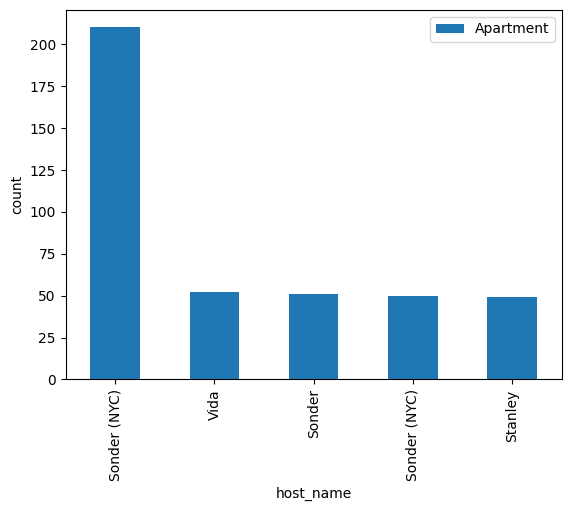

In [39]:
top_apartments.head(5).plot(kind='bar',x='host_name',y='Apartment')
plt.xlabel('host_name')
plt.ylabel('count')
plt.show()

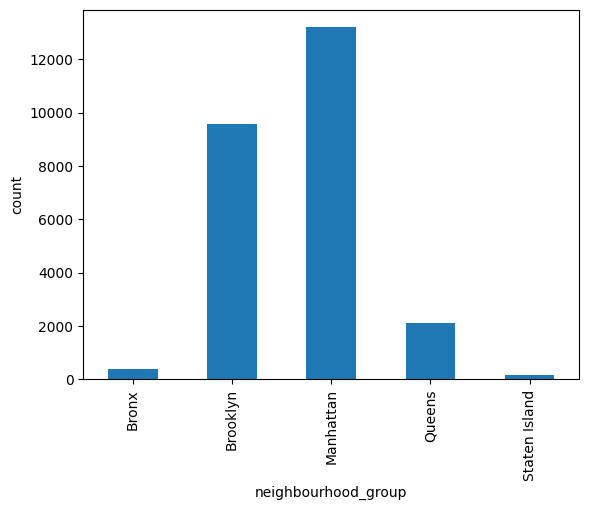

In [37]:
apt.groupby(['neighbourhood_group']).size().plot(kind='bar')
plt.xlabel('neighbourhood_group')
plt.ylabel('count')
plt.show()